In [10]:
# Import the pandas library 
import pandas as pd

# Create DataFrame from the Olympic medalists CSV file
df = pd.read_csv("olympics_08_medalists.csv")

# Display the first 15 rows of the DataFrame 
df.head(15)

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Acer Nethercott,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Adam Korol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Adam Kreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Adam Pine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Adam Wheeler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bronze


In [11]:
# Reshape the DataFrame from wide to long format using melt
# - id_vars: 'medalist_name' as identifier column
# - var_name: column that will contain original column names as 'sport'
# - value_name: column that will contain values as 'Medal'
df_melted = df.melt(id_vars=['medalist_name'], 
                    var_name='sport', 
                    value_name='Medal')
 
# Remove rows with no Medal value 
df_melted = df_melted.dropna()

# Split 'sport' column into 'Sex' and 'Sport' columns
df_melted[['Sex', 'Sport']] = df_melted['sport'].str.split(pat = "_", expand = True)

# drop old combined 'sport' column
df_melted = df_melted.drop(columns=['sport'])

# Display the first 15 rows of the DataFrame 
df_melted.head(15)

,medalist_name,Medal,Sex,Sport
177,Bair Badënov,bronze,male,archery
676,Ilario Di Buò,silver,male,archery
682,Im Dong-hyun,gold,male,archery
760,Jiang Lin,bronze,male,archery
920,Lee Chang-hwan,gold,male,archery
950,Li Wenquan,bronze,male,archery
1043,Marco Galiazzo,silver,male,archery
1107,Mauro Nespoli,silver,male,archery
1314,Park Kyung-mo,silver,male,archery
1710,Viktor Ruban,gold,male,archery


<Axes: title={'center': 'Count of Medals by Type'}, xlabel='Medal Type'>

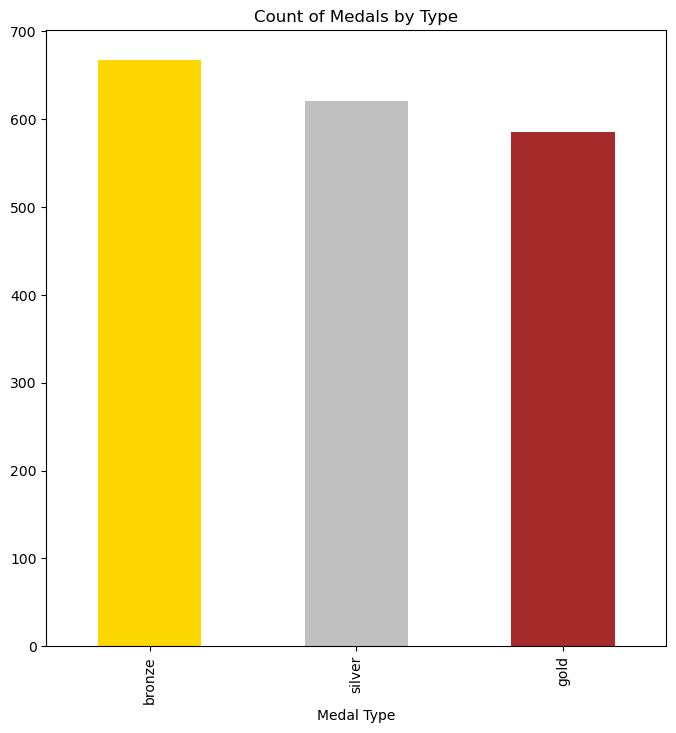

In [ ]:
# make variable that counts occurences of each medal type
medal_counts = df_melted['Medal'].value_counts()

# make a bar plot
medal_counts.plot(
    kind='bar',                        # bar chart visualization
    color=['gold', 'silver', 'brown'], # Sets gold, silver, and brown as bar colors 
    figsize=(8, 8),                    # Sets the figure size to 8 inches wide and tall
    title='Count of Medals by Type',   # Adds title 
    xlabel='Medal Type',               # Adds x-label 
    )                


<Axes: title={'center': 'Count of Medals by Sex'}, xlabel='Sex'>

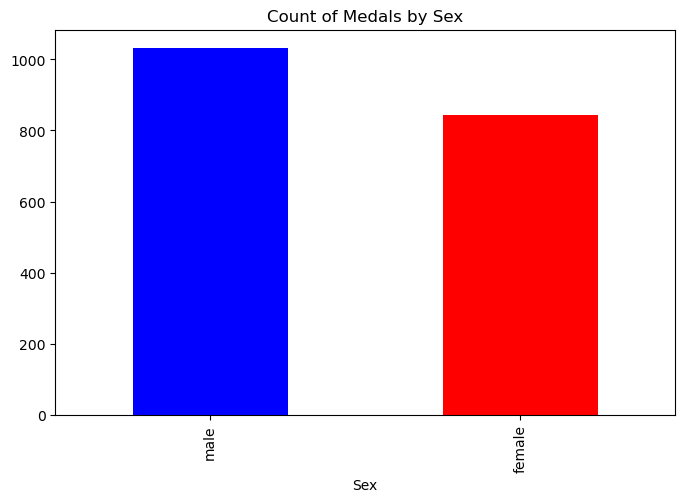

In [ ]:
# make variable that counts occurences of each sex
Sex_count = df_melted['Sex'].value_counts()

# Create a bar plot
Sex_count.plot(
    kind='bar',                       # bar chart visualization
    color=['blue', 'red'],            # Sets gold, silver, and brown as bar colors 
    figsize=(8, 5),                   # Sets the figure size to 8 in wide and 5 in tall
    title='Count of Medals by Sex',   # Add title
    xlabel='Sex',                     # Add x-label 
    )

<Axes: title={'center': 'Gold Medals by Sport'}, xlabel='Number of Medals', ylabel='Sport'>

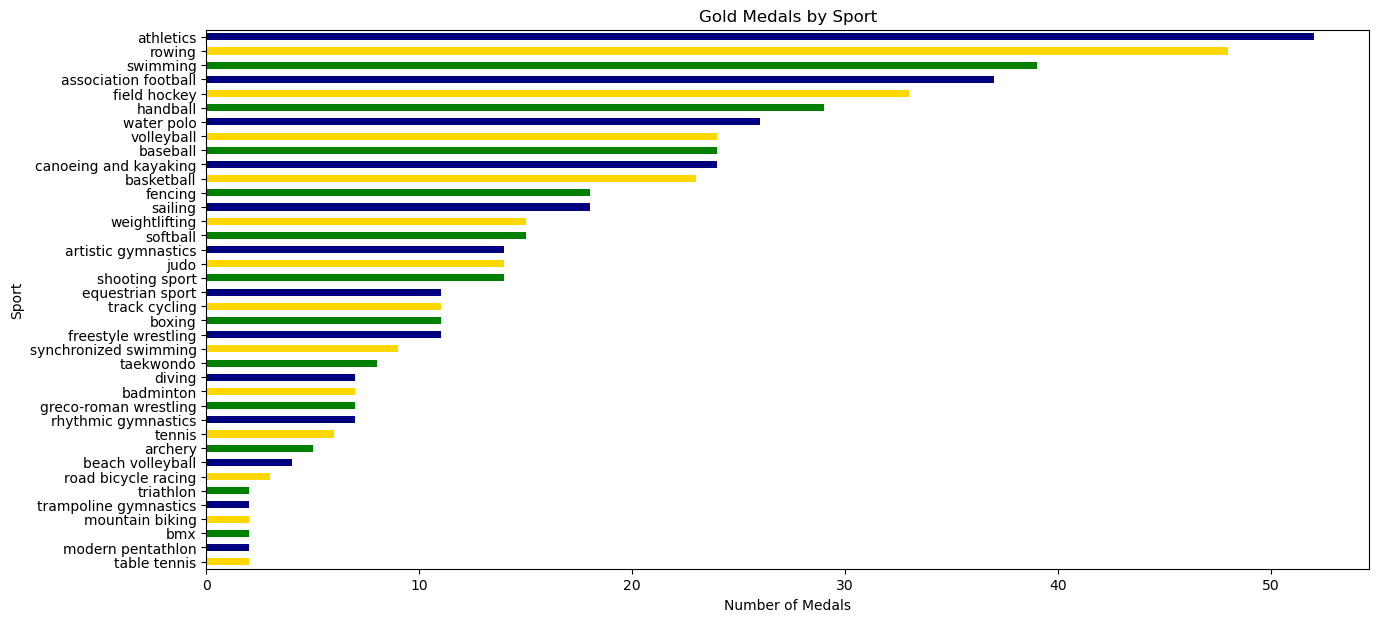

In [ ]:
# Create a DataFrame with Sports as rows and Medals as columns
medals_by_sport = df_melted.groupby('Sport')['Medal'].value_counts().unstack()

# Create a horizontal bar chart showing total medals per sport
# - sum(axis=1): Sum across rows to get total medals for each sport regardless of medal type
# - sort_values(): Sort in ascending value
medals_by_sport['gold'].sort_values().plot(
    kind='barh',                        # Horizontal bar chart
    color=['gold', 'navy', 'green'],    # Colors (ND)
    figsize=(15, 7),                    # 15 in wide and 7 in tall
    title='Gold Medals by Sport',       # Chart title
    xlabel='Number of Medals',          # horizontal axis
    ylabel='Sport'                      # vertical axis
)
